# 4. El juego de dados requiere que el jugador arroje dos dados una o mas veces hasta que se llegue a una decision sobre si el (o ella) gana o pierde. El gana si la primera tirada resulta en una suma de 7 u 11 o, alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y la misma suma reaparece antes de que aparezca una suma de 7. Por el contrario, pierde si la primera tirada resulta en una suma de 2, 3 o 12 o, alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y aparece una suma de 7 antes de la primera suma reaparece.

## a) calcule la probabilidad de ganar corriendo 10,000 simulaciones.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt 
from functools import reduce


In [2]:
def dados():
    '''Esta funcion es la encargada de realizar el lanzamiento de los dados y regresar la suma'''
    dado1=random.randint(1,6)
    dado2=random.randint(1,6)
    return dado1+dado2
    

In [14]:
def game(status:"Estatus del lanzamiento"):
    '''Esta funcion es la encargada de regresar el resultado de un juego completo'''
    won=False
    status2=0
    if status==7 or status==11:
        won=True
    else:
        if status>=4 and status<=10:
            status2=dados()
            if status2==7:
                won=False
            else:
                while status2!=7 and won!=True:
                    if status==status2:
                        won=True
                    else:
                        status2=dados()
    return won,status,status2
            

In [35]:
N = 10000
x=[1 for i in range(N) if game(dados())[0]]
prob=sum(x)/10000
print("Jugando 10,000 veces la probabilidad de ganar es de:",prob)

0.4888

## b) Imagina que cada juego ganas o pierdes 50. Si inicias con 500. ¿Cual es tu valor esperado de dinero despues de 10 juegos? ¿y el mas probable? ¿Cual es la probabilidad de ganar dinero?.

In [139]:
def bet(cash:"Cantidad de dinero inicial",Bet:"Cantidad de dinero a apostar",ngames:"Numero de veces que se jugara"):
    '''Esta funcion es la encargada de realizar la apuesta completa para un jugador con su
    capital y la cantidad que apostara'''
    cash=[cash]
    x=list(map(lambda n:cash.append(Bet) if(game(dados())[0]) else cash.append(-Bet),range(ngames)))
    return sum(cash)


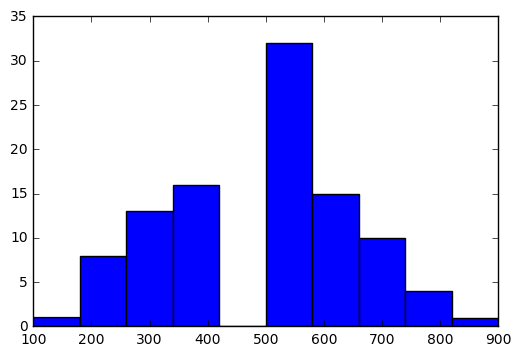

media:  481.0

probabilidad de ganar despues de jugar  10  juegos: 0.62


In [146]:
iterations=100
money=500
pot=50
ng=10
x=(list(map(lambda n:bet(money,pot,ng),np.arange(iterations))))
plt.hist(x)
plt.show()
print("media: ",np.mean(x))
result=list(filter(lambda x:x>=money,x))
print("\nprobabilidad de ganar dinero despues de jugar ",ng," juegos:",np.size(result)/iterations)

In [150]:
plays=[10,100,1000]
x=list(map(lambda y:(list(map(lambda n:bet(money,pot,y),np.arange(iterations)))),plays))



En promedio mi dinero fue: 185.0


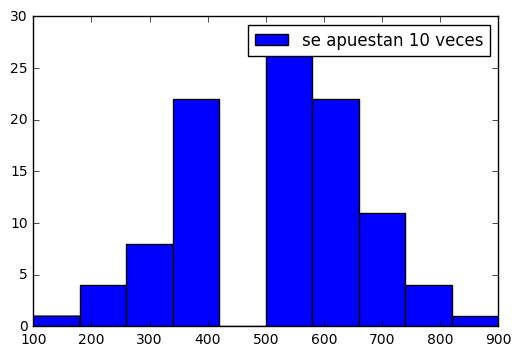

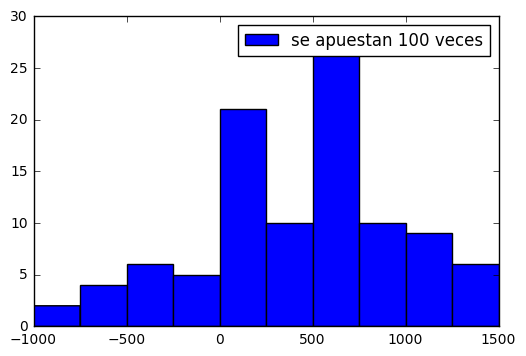

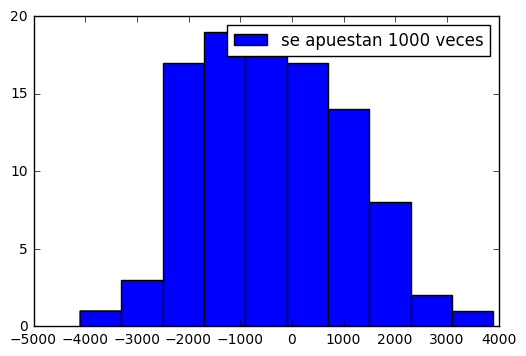

In [168]:
i=1
final=[]
plays=[10,100,1000]
money=500
pot=50
for j in plays:
    x=(list(map(lambda n:bet(money,pot,j),np.arange(iterations))))
    final.append(x)
    plt.figure(i)
    plt.hist(x,label= 'se apuestan %i veces' %j)
    plt.legend()
    i += 1
print('En promedio mi dinero fue:',np.mean(final))
plt.show()



# 5. Una inversion en cetes actualmente promete un rendimiento que va entre el 8 % y el 12 % anual.
## a) Considera la cantidad total de dinero que obtendras al final del ano dado una inversion inicial de 300000. Realiza un programa que simule 10,000 escenarios diferentes que puedan suceder, calcula su media, su desviacion estandar y grafica su histograma.


In [289]:
def rate():
    '''Funcion encargada de generar tasas de interes aleatorias en el rango para el ejercicio'''
    return random.uniform(.08, .121)
    #return np.random.randint(8,13)/100



In [254]:
money=300000
def investment(money:"Cantidad a invertir",interest:"Tasa de interes",time:"Tiempo de la inversion en años"):
    '''Funcion encargada de realizar el calculo del valor futuro con un interes compuesto'''
    return money*(1+interest)**time

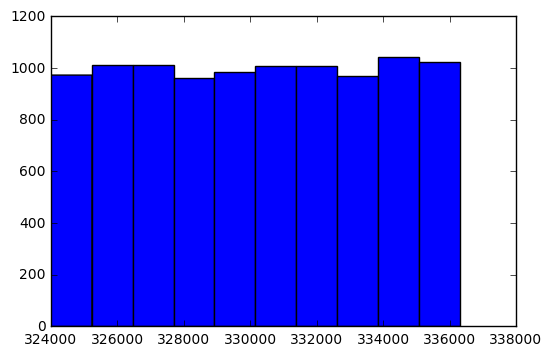

Media de los escenarios:  330191.915586

Desviacion estandar de los escenarios 3563.46769953


In [290]:
investments=list(map(lambda n:investment(money,n,1),list(map(lambda y:rate(),range(10000)))))
plt.hist(investments)
plt.show()
print("Media de los escenarios: ",np.mean(investments))
print("\nDesviacion estandar de los escenarios",np.std(investments))

In [244]:
#np.size(list(filter(lambda x:x<=.12 and x>=.08,np.abs(np.random.normal(0.08,.12,10000)))))
#rate=lambda x:x if x<=.12 and x>=.08 else 0
#rates=rate(np.abs(np.random.normal(0.08,.12)))
#a

0.081367999900041038

## b) Ahora supon que dejas el dinero durante 6 anos, Realiza un programa que simule 10,000 escenarios diferentes que puedan suceder, calcula su media, su desviacion estandar y grafica su histograma. ¿Cual es la probabilidad de ganar mas de 58000? ¿Cual es la probabilidad de ganar menos de 55000?.

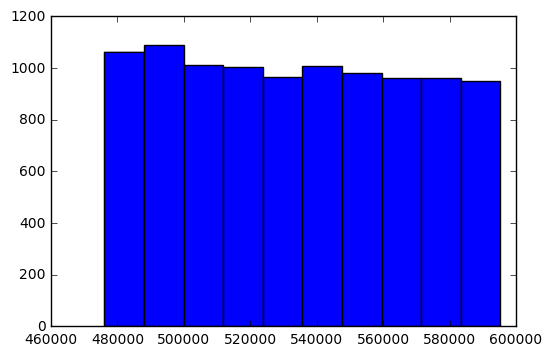

Media de los escenarios:  534417.191382

Desviacion estandar de los escenarios 34498.2493366
Probabilidad de ganar mas de 580,000:  0.1218 
Probabilidad de ganar menos de 550,000:  0.6363


In [291]:
investments=list(map(lambda n:investment(money,n,6),list(map(lambda y:rate(),range(10000)))))
plt.hist(investments)
plt.show()
print("Media de los escenarios: ",np.mean(investments))
print("\nDesviacion estandar de los escenarios",np.std(investments))
lower=np.size(list(filter(lambda investments:investments<=550000,investments)))/10000
higher=np.size(list(filter(lambda investments:investments>=580000,investments)))/10000
print("Probabilidad de ganar mas de 580,000: ",higher,"\nProbabilidad de ganar menos de 550,000: ",lower)

## c) Repite el inciso b), pero suponiendo que el rendimiento es discreto, es decir, solo puede tomar los valores enteros 8,9,10,11,12. ¿Cual es la probabilidad de ganar entre 53000 y 56000?

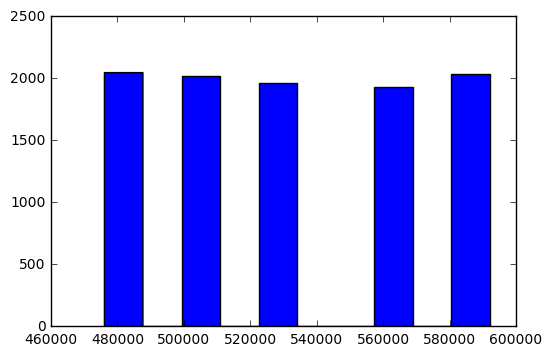

Media de los escenarios:  532456.249618

Desviacion estandar de los escenarios 41328.4141502
Probabilidad de ganar mas de 530,000 y menos de 560,000:  0.1965


In [292]:
def rate_dis():
    '''Funcion encargada de generar numeros aleatorios discretos'''
    return np.random.randint(8,13)/100

investments=list(map(lambda n:investment(money,n,6),list(map(lambda y:rate_dis(),range(10000)))))
plt.hist(investments)
plt.show()
print("Media de los escenarios: ",np.mean(investments))
print("\nDesviacion estandar de los escenarios",np.std(investments))
prob=np.size(list(filter(lambda investments:investments<=560000 and investments>=530000 ,investments)))/10000
print("Probabilidad de ganar mas de 530,000 y menos de 560,000: ",prob)